# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import math

In [2]:
#Downloading dataset using Yahoo-finance API
import yfinance as yf
df = yf.download('SBIN.NS', start = '2015-01-01', end='2023-05-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,290.288177,6138488
2015-01-02,314.350006,318.299988,314.350006,315.250000,291.443817,9935094
2015-01-05,316.250000,316.799988,312.100006,312.750000,289.132568,9136716
2015-01-06,310.000000,311.100006,298.700012,299.899994,277.252960,15329257
2015-01-07,300.000000,302.549988,295.149994,300.149994,277.484070,15046745


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,543.799988,555.549988,543.500000,554.599976,544.028137,23335611
2023-04-25,555.000000,567.900024,555.000000,561.799988,551.090881,38142390
2023-04-26,562.000000,567.000000,556.450012,566.349976,555.554138,23143882
2023-04-27,565.000000,567.400024,561.099976,564.750000,553.984680,17845169
2023-04-28,567.799988,580.450012,565.500000,578.299988,567.276367,16183423


In [5]:
df.shape

(2055, 6)

Text(0, 0.5, 'Close Price')

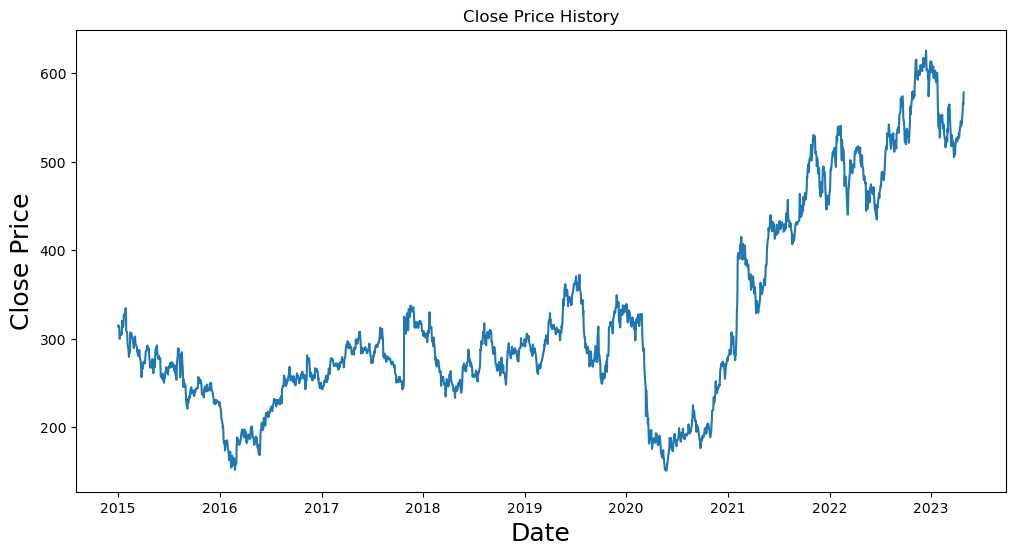

In [6]:
#visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

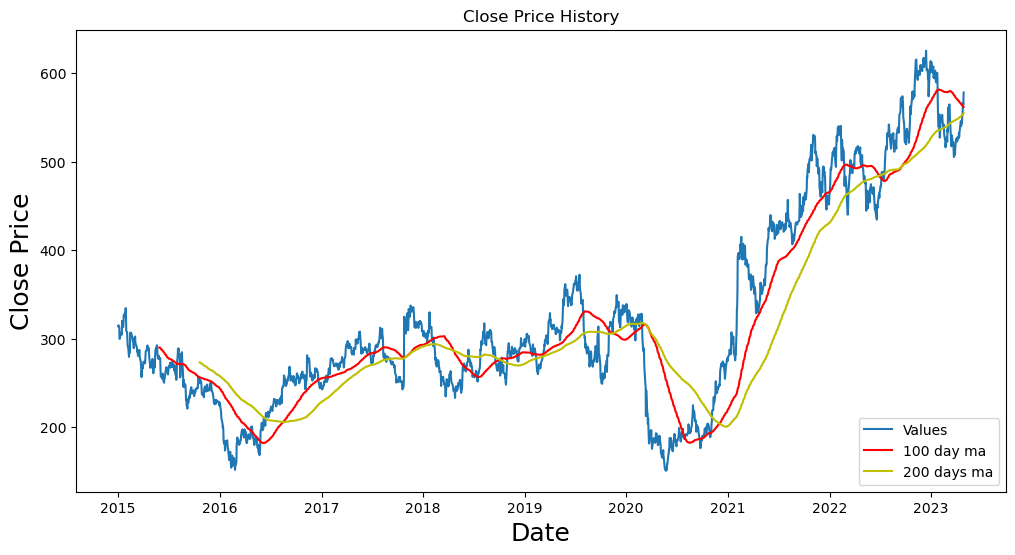

In [7]:
#100 and 200 days moving average
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (12,6))
plt.title('Close Price History')
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'y')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Values', '100 day ma ', '200 days ma'], loc = 'lower right')

In [8]:
#Create a new dataframe with only close coloumn
data = df.filter(['Close'])

In [9]:
#Convert the Dataframe to a numpy array
dataset = data.values

In [10]:
#Get the number of rows to train the model
train_data_len = math.ceil(len(dataset) * 0.8)
train_data_len

1644

In [11]:
#Scale the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(dataset).reshape(-1,1))

C:\Users\amare\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
scaled_data

array([[0.34372695],
       [0.34636047],
       [0.34109343],
       ...,
       [0.87538181],
       [0.87201095],
       [0.90055828]])

In [13]:
#Create the training dataset and Scaled training dataset
train_data = scaled_data[0:train_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.34372695, 0.34636047, 0.34109343, 0.31402084, 0.31454754,
       0.3244496 , 0.32097337, 0.32918993, 0.3249763 , 0.32413359,
       0.35699986, 0.34678186, 0.34193614, 0.35247022, 0.36943012,
       0.36616452, 0.37206364, 0.37754131, 0.38712736, 0.37111555,
       0.33308756, 0.33003265, 0.31486355, 0.29958914, 0.2948488 ,
       0.29379539, 0.27104181, 0.28747495, 0.2846308 , 0.2811545 ,
       0.32887392, 0.32834722, 0.3262404 , 0.31918256, 0.31907718,
       0.30696299, 0.30633097, 0.30485618, 0.29189927, 0.31402084,
       0.31844516, 0.31970926, 0.30127463, 0.30116925, 0.29453279,
       0.28810703, 0.28294531, 0.28652692, 0.27367533, 0.27557145,
       0.27862636, 0.28747495, 0.27546614, 0.26840829, 0.26103444,
       0.25218579, 0.2413357 , 0.22290106, 0.23754346, 0.24660274])]
[0.24481193128340162]



In [14]:
#Convert the x_train and y_train in numpy array
x_train, y_train = np.array(x_train),np.array(y_train)

In [15]:
#Reshape the data
x_train.shape

(1584, 60)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1584, 60, 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 11s 136ms/step - loss: 0.0170
Epoch 2/20
25/25 [==============================] - 3s 125ms/step - loss: 0.0028
Epoch 3/20
25/25 [==============================] - 3s 142ms/step - loss: 0.0019
Epoch 4/20
25/25 [==============================] - 3s 133ms/step - loss: 0.0016
Epoch 5/20
25/25 [==============================] - 3s 122ms/step - loss: 0.0015
Epoch 6/20
25/25 [==============================] - 3s 123ms/step - loss: 0.0014
Epoch 7/20
25/25 [==============================] - 3s 123ms/step - loss: 0.0012
Epoch 8/20
25/25 [==============================] - 4s 142ms/step - loss: 0.0011
Epoch 9/20
25/25 [==============================] - 3s 114ms/step - loss: 9.9507e-04
Epoch 10/20
25/25 [==============================] - 3s 133ms/step - loss: 9.6791e-04
Epoch 11/20
25/25 [==============================] - 3s 126ms/step - loss: 9.2916e-04
Epoch 12/20
25/25 [==============================] - 3s 124ms/step - loss: 9.5728e-04
Epoch 13

In [22]:
model.save('my_final_model.h5') 

C:\Users\amare\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
#Create the testing Dataset
#Create a new array containing scaled values from index
test_data = scaled_data[train_data_len - 60: , :]

In [24]:
#Create the dataset x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [25]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [26]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
#Get the model predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 50ms/step


In [28]:
#Get the root mean squared error(RMSE)
#rmse = np.sqrt(np.mean(predictions - y_test)**2)
#rmse

In [29]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

13.79285580173461

In [30]:
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse

13.79285580173461

In [31]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

C:\Users\amare\AppData\Local\Temp\ipykernel_18108\531535618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


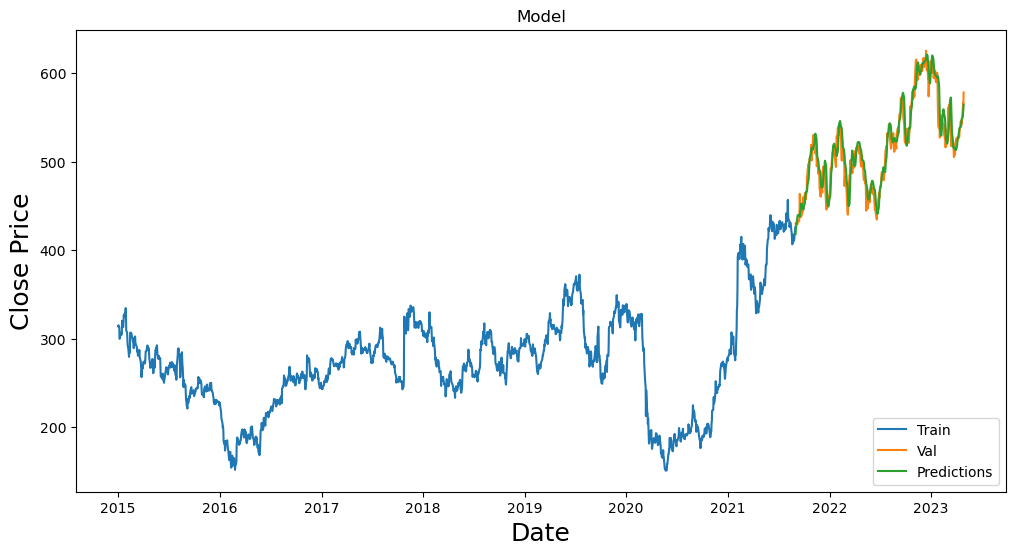

In [32]:
#Visualize the predicted model
plt.figure(figsize= (12,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [33]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-01,429.899994,418.332123
2021-09-02,429.750000,422.888702
2021-09-03,431.399994,427.926361
2021-09-06,431.049988,432.719116
2021-09-07,429.100006,436.552887
...,...,...
2023-04-24,554.599976,549.739380
2023-04-25,561.799988,551.543640
2023-04-26,566.349976,554.764709


In [34]:
#Get the Data
stock_quote = yf.download('SBIN.NS', start = '2018-01-01', end='2023-03-15') 

[*********************100%***********************]  1 of 1 completed


In [35]:
new_df = stock_quote.filter(['Close'])

#Last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [36]:
#Predicting the price of the stock using last 60 days data
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 33ms/step
[[559.4406]]
